# Problem 2

Using the graph presented in `Figure 2` as input, where `'S'` is the initial node and `'G'` is the goal of the search, solve the following exercises (consider that in any of the searches, the nodes are generated in alphabetical order and visiting a node corresponds to the expansion process of the same):

1. Determine the order of node visitation and the path returned by the `BFS` (breadth-first search) strategy.
2. Determine the order of node visitation and the path returned by the `DFS` (depth-first search) strategy.
3. Determine the order of node visitation and the path returned by the `UCS` (uniform cost search) strategy.

<p align="center">
  <img align="center" width="400" alt="figure1" src="./images/figure2.png"/>
</p>


# Methodology

What we will do is to create a graph in a simple representation using dictionaries, then we will implement the three search algorithms and we will analyze the results interms of time taken and number of nodes, cost and path taken to reach the goal node.

Then we will plot the results to see the differences between the three search algorithms.

Finally we will compare the theorical results with the results obtained in the implementation.


# Theoretical Concepts

## Breadth-First Search

Breadth-first search is an algorithm for traversing or searching tree or graph data structures. It starts at the tree root, and explores all of the neighbor nodes at the present depth prior to moving on to the nodes at the next depth level.

<table>
  <thead>
    <tr>
      <th>Iteración</th>
      <th>Nodos Visitados</th>
      <th>Frontera</th>
      <th>Nodo Actual</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>[S]</td>
      <td>[]</td>
      <td>S</td>
    </tr>
    <tr>
      <td>1</td>
      <td>[S, A]</td>
      <td>[B, C]</td>
      <td>A</td>
    </tr>
    <tr>
      <td>2</td>
      <td>[S, A, B]</td>
      <td>[C, D]</td>
      <td>B</td>
    </tr>
    <tr>
      <td>3</td>
      <td>[S, A, B, C]</td>
      <td>[D, G, E]</td>
      <td>C</td>
    </tr>
    <tr>
      <td>4</td>
      <td>[S, A, B, C, D]</td>
      <td>[G, E]</td>
      <td>D</td>
    </tr>
    <tr>
      <td>5</td>
      <td>[S, A, B, C, D, G]</td>
      <td>[E, F]</td>
      <td>G</td>
    </tr>
  </tbody>
</table>

## Depth-First Search

Depth-first search is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node and explores as far as possible along each branch before backtracking.

<table>
  <thead>
    <tr>
      <th>Iteration</th>
      <th>Visited Nodes</th>
      <th>Frontier</th>
      <th>Current Node</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>2</td>
      <td>[S, A, D]</td>
      <td>[C, B]</td>
      <td>D</td>
    </tr>
    <tr>
      <td>3</td>
      <td>[S, A, D, B]</td>
      <td>[C, B, F]</td>
      <td>B</td>
    </tr>
    <tr>
      <td>4</td>
      <td>[S, A, D, B, G]</td>
      <td>[C, B, F, E]</td>
      <td>G</td>
    </tr>
  </tbody>
</table>

## Uniform Cost Search

Uniform Cost Search is a variant of Dijkstra's algorithm. It explores the nodes in the order of their cost. It is guaranteed to find the optimal solution if the cost is an increasing function of the path length.

<table>
  <thead>
    <tr>
      <th>Iteration</th>
      <th>Visited Nodes</th>
      <th>Frontier</th>
      <th>Current Node</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>0</td>
      <td>[S]</td>
      <td>[]</td>
      <td>S</td>
    </tr>
    <tr>
      <td>1</td>
      <td>[S, C]</td>
      <td>[A, B]</td>
      <td>C</td>
    </tr>
    <tr>
      <td>2</td>
      <td>[S, C, A]</td>
      <td>[E, B]</td>
      <td>A</td>
    </tr>
    <tr>
      <td>3</td>
      <td>[S, C, A, E]</td>
      <td>[B, D]</td>
      <td>E</td>
    </tr>
    <tr>
      <td>4</td>
      <td>[S, C, A, E, B]</td>
      <td>[B, D, H, F]</td>
      <td>B</td>
    </tr>
    <tr>
      <td>5</td>
      <td>[S, C, A, E, B, D]</td>
      <td>[H, F, D, G]</td>
      <td>D</td>
    </tr>
    <tr>
      <td>6</td>
      <td>[S, C, A, E, B, D, H]</td>
      <td>[F, D, F, G]</td>
      <td>H</td>
    </tr>
    <tr>
      <td>7</td>
      <td>[S, C, A, E, B, D, H, F]</td>
      <td>[D, F, G, G]</td>
      <td>F</td>
    </tr>
    <tr>
      <td>8</td>
      <td>[S, C, A, E, B, D, H, F, G]</td>
      <td>[G, G]</td>
      <td>G</td>
    </tr>
  </tbody>
</table>

To summarize, the order in which the nodes will be visited is:

<table>
  <tr>
    <th>Algorithm</th>
    <th>Path</th>
    <th>Total</th>
  </tr>
  <tr>
    <td>BFS</td>
    <td>S, A, B, C, D, G</td>
    <td>6</td>
  </tr>
  <tr>
    <td>DFS</td>
    <td>S, A, D, B, G</td>
    <td>5</td>
  </tr>
  <tr>
    <td>UCS</td>
    <td>S, C, A, E, B, D, H, F, G</td>
    <td>9</td>
  </tr>
</table>


# Main Objective

1. Implement the three search algorithms: BFS, DFS and UCS.
2. Analyze the results in terms of time taken, number of nodes, cost and path taken to reach the goal node.
3. Plot the results to see the differences between the three search algorithms.

# Secondary Objectives

1. Create a simple representation of the graph using dictionaries.
2. Implement the search algorithms in a simple and easy to understand way.
3. Analyze the results in a simple and easy to understand way.
4. Plot the results in a simple and easy to understand way.


# Implementation

In order to create the graph, we will use a class called `Graph` and a function called `create_graph` that will return the graph in a dictionary format.


In [115]:
from typing import Dict, List, Tuple, Set, Optional

class Graph:
    def __init__(self) -> None:
        self.edges: Dict[str, List[Tuple[str, int]]] = {}
        
    def add_edge(self, from_node: str, to_node: str, weight: int) -> None:
        if from_node not in self.edges:
            self.edges[from_node] = []
        if to_node not in self.edges:
            self.edges[to_node] = []

        # this is an undirected graph
        self.edges[from_node].append((to_node, weight))
        self.edges[to_node].append((from_node, weight))

    def get_neighbors(self, node: str) -> List[Tuple[str, int]]:
        return self.edges.get(node, [])
    
    def __str__(self) -> str:
        return str(self.edges)
    
    def __repr__(self) -> str:
        return str(self.edges)
    

def create_graph() -> Graph:
    graph = Graph()
    edges = [
        ('S', 'A', 3),
        ('S', 'B', 6),
        ('S', 'C', 2),
        ('A', 'D', 3),
        ('B', 'G', 9),
        ('B', 'E', 2),
        ('B', 'D', 4),
        ('C', 'E', 1),
        ('D', 'F', 5),
        ('E', 'H', 5),
        ('E', 'F', 6),
        ('F', 'G', 5),
        ('H', 'G', 8),
    ]

    for edge in edges:
        graph.add_edge(*edge)

    return graph

Then we will implement the three search algorithms: `BFS`, `DFS` and `UCS`.

All of them are going to return the path taken to reach the goal node, the cost of the path and the order of node visitation.

The first algorithm is the `BFS` and its implementation is shown below:


In [116]:
def bfs(
        graph: Graph,
        start: str,
        goal: str
        ) -> Tuple[Optional[List[str]], List[str], int]:
    
    visited: Set[str] = set() # Reached Nodes
    queue: List[Tuple[str, List[str], int]] = [(start, [start], 0)] # Frontier
    visited_order: List[str] = [] # Order of visited nodes
    
    while queue:
        # This pop looks like [(Node, [Nodes], Cost)]
        current_node, path, cost = queue.pop(0)
        
        if current_node in visited:
            continue
        
        # Add the current node to the visited set and the visited order list
        visited.add(current_node)
        visited_order.append(current_node)
        
        if current_node == goal:
            return path, visited_order, cost
        
        for neighbor, weight in graph.get_neighbors(current_node):
            if neighbor not in visited:
                new_path = path + [neighbor]
                new_cost = cost + weight
                queue.append((neighbor, new_path, new_cost))
    
    return None, visited_order, 0

Next we will implement the `DFS` algorithm:


In [117]:
def dfs(
        graph: Graph, 
        start: str, 
        goal: str
        ) -> Tuple[Optional[List[str]], List[str], int]:
    
    visited: Set[str] = set() # Reached Nodes
    stack: List[Tuple[str, List[str], int]] = [(start, [start], 0)] # Frontier
    visited_order: List[str] = [] # Order of visited nodes
    
    while stack:
        current_node, path, cost = stack.pop()
        
        if current_node in visited:
            continue
        
        visited.add(current_node)
        visited_order.append(current_node)
        
        if current_node == goal:
            return path, visited_order, cost
        
        for neighbor, weight in reversed(graph.get_neighbors(current_node)):
            if neighbor not in visited:
                new_path = path + [neighbor]
                new_cost = cost + weight
                stack.append((neighbor, new_path, new_cost))
    
    return None, visited_order, 0


Finally we will implement the `UCS` algorithm:


In [118]:
def ucs(
        graph: Graph, 
        start: str, 
        goal: str
        ) -> Tuple[Optional[List[str]], List[str], int]:
    
    visited: Set[str] = set() # Reached Nodes
    queue: List[Tuple[int, str, List[str], int]] = [(0, start, [start], 0)] # Frontier
    visited_order: List[str] = [] # Order of visited nodes
    
    while queue:
        # Sort the priority queue by cumulative cost
        queue.sort(key=lambda x: x[0])
        cost, current_node, path, total_cost = queue.pop(0)
        
        if current_node in visited:
            continue
        
        visited.add(current_node)
        visited_order.append(current_node)
        
        if current_node == goal:
            return path, visited_order, total_cost
        
        for neighbor, weight in graph.get_neighbors(current_node):
            if neighbor not in visited:
                new_path = path + [neighbor]
                new_total_cost = total_cost + weight
                queue.append((new_total_cost, neighbor, new_path, new_total_cost))
    
    return None, visited_order, 0

# Results

In order to see the behavior of the three search algorithms, we will run a simple test using the graph presented in `Figure 2`.


In [119]:
graph = create_graph()
start_node = 'S'
goal_node = 'G'

# BFS
shortest_path_bfs, visited_order_bfs, cost_bfs = bfs(graph, start_node, goal_node)
print(f"BFS: The path from {start_node} to {goal_node}: {', '.join(shortest_path_bfs)}")
print(f"BFS: The cost of the trip is: {cost_bfs}")
print(f"BFS: The order of visited nodes using BFS is: {', '.join(visited_order_bfs)}", end="\n\n")

# DFS
shortest_path_dfs, visited_order_dfs, cost_dfs = dfs(graph, start_node, goal_node)
print(f"DFS: The path from {start_node} to {goal_node}: {', '.join(shortest_path_dfs)}")
print(f"DFS: The cost of the trip is: {cost_dfs}")
print(f"DFS: The order of visited nodes using DFS is: {', '.join(visited_order_dfs)}", end="\n\n")

# UCS
shortest_path_ucs, visited_order_ucs, cost_ucs = ucs(graph, start_node, goal_node)
print(f"UCS: The path from {start_node} to {goal_node}: {', '.join(shortest_path_ucs)}")
print(f"UCS: The cost of the trip is: {cost_ucs}")
print(f"UCS: The order of visited nodes using UCS is: {', '.join(visited_order_ucs)}")


BFS: The path from S to G: S, B, G
BFS: The cost of the trip is: 15
BFS: The order of visited nodes using BFS is: S, A, B, C, D, G

DFS: The path from S to G: S, A, D, B, G
DFS: The cost of the trip is: 19
DFS: The order of visited nodes using DFS is: S, A, D, B, G

UCS: The path from S to G: S, C, E, B, G
UCS: The cost of the trip is: 14
UCS: The order of visited nodes using UCS is: S, C, A, E, B, D, H, F, G


The results are shown below:

-   BFS:

    -   Path: `S -> B -> G`
    -   Cost: 15
    -   Visited nodes: `S -> A -> B -> C -> D -> G`

-   DFS:

    -   Path: `S -> A -> D -> B -> G`
    -   Cost: 19
    -   Visited nodes: `S -> A -> D -> B -> G`

-   UCS:
    -   Path: `S -> C -> E -> B -> G`
    -   Cost: 14
    -   Visited nodes: `S -> C -> A -> E -> B -> D -> H -> F -> G`

As we can see, the results are consistent with the theoretical concepts presented above.


To have a better understanding of the results, we will plot the graphs of the three search algorithms, for that we will use the `networkx` library as well as the `matplotlib` library.

The `brown` color represents the nodes, the `green` color represents the path taken to reach the goal node and the `blue` color represents the nodes that were visited.


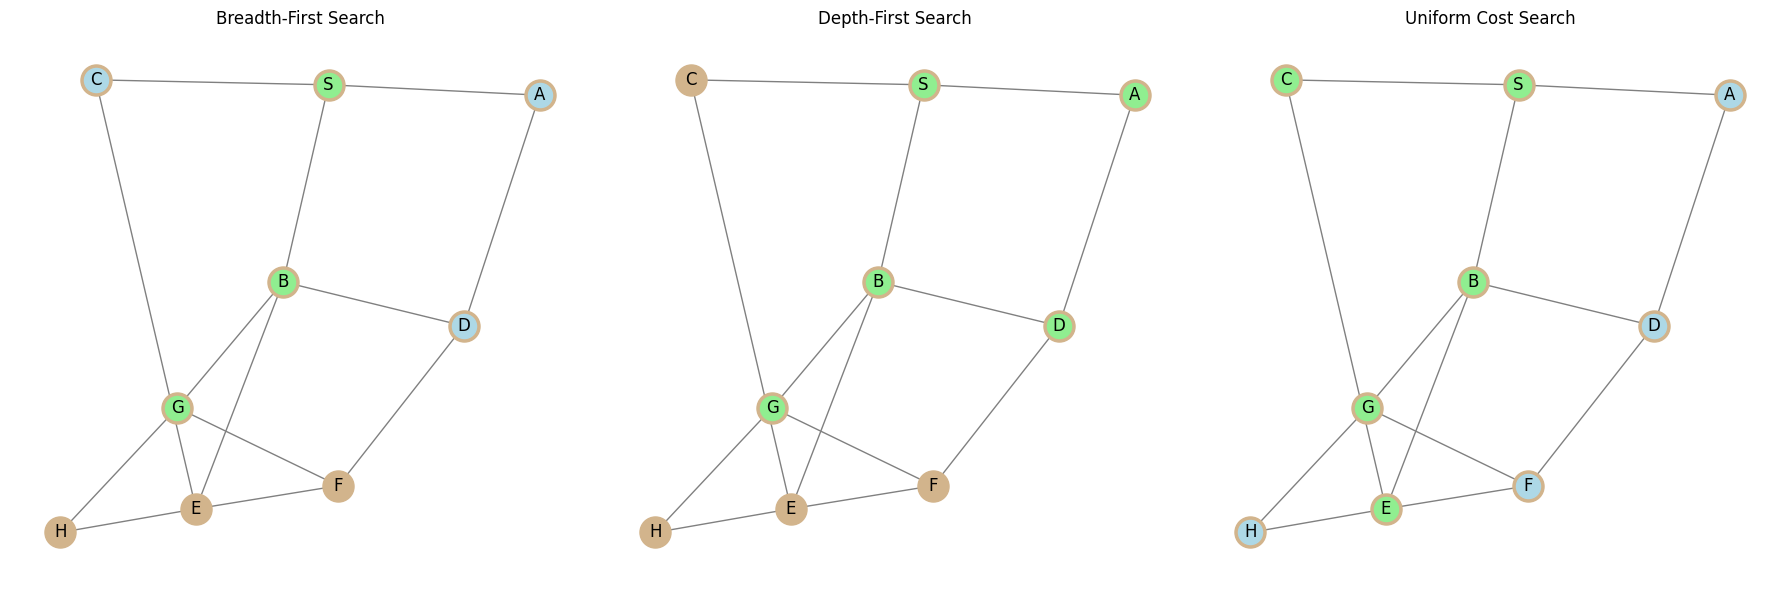

In [120]:
import matplotlib.pyplot as plt
import networkx as nx

def plot_search_algorithms_results(graph_obj, start, goal):
    # Convert Graph object to a NetworkX
    nx_graph = nx.Graph()
    for node, edges in graph_obj.edges.items():
        for edge in edges:
            nx_graph.add_edge(node, edge[0], weight=edge[1])
    
    pos = nx.spring_layout(nx_graph, seed=42)
    
    # Obtain search results
    bfs_path, bfs_order, _ = bfs(graph_obj, start, goal)
    dfs_path, dfs_order, _ = dfs(graph_obj, start, goal)
    ucs_path, ucs_order, _ = ucs(graph_obj, start, goal)

    _, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plotting function
    def plot_results(ax, path, order, title):
        
        default_node_color = 'tan'
        visited_node_color = 'lightblue'
        path_node_color = 'lightgreen'
        
        # Draw the full graph
        nx.draw(nx_graph, pos, node_size=500, with_labels=True, node_color=default_node_color, edge_color='gray', ax=ax)
        
        # Highlight the visited and path nodes
        visited_nodes = set(order) - set(path)
        path_nodes = set(path)
        
        nx.draw_networkx_nodes(nx_graph, pos, nodelist=list(visited_nodes), node_color=visited_node_color, ax=ax)
        nx.draw_networkx_nodes(nx_graph, pos, nodelist=list(path_nodes), node_color=path_node_color, ax=ax)
        
        ax.set_title(title)

    # Plot results for each search algorithm
    plot_results(axes[0], bfs_path, bfs_order, 'Breadth-First Search')
    plot_results(axes[1], dfs_path, dfs_order, 'Depth-First Search')
    plot_results(axes[2], ucs_path, ucs_order, 'Uniform Cost Search')

    plt.tight_layout()
    plt.show()

# Create the graph instance and add your edges
graph_instance = create_graph()

# Plotting the results
plot_search_algorithms_results(graph_instance, 'S', 'G')


Now we will run the three search algorithms 1000000 of times and plot the results:


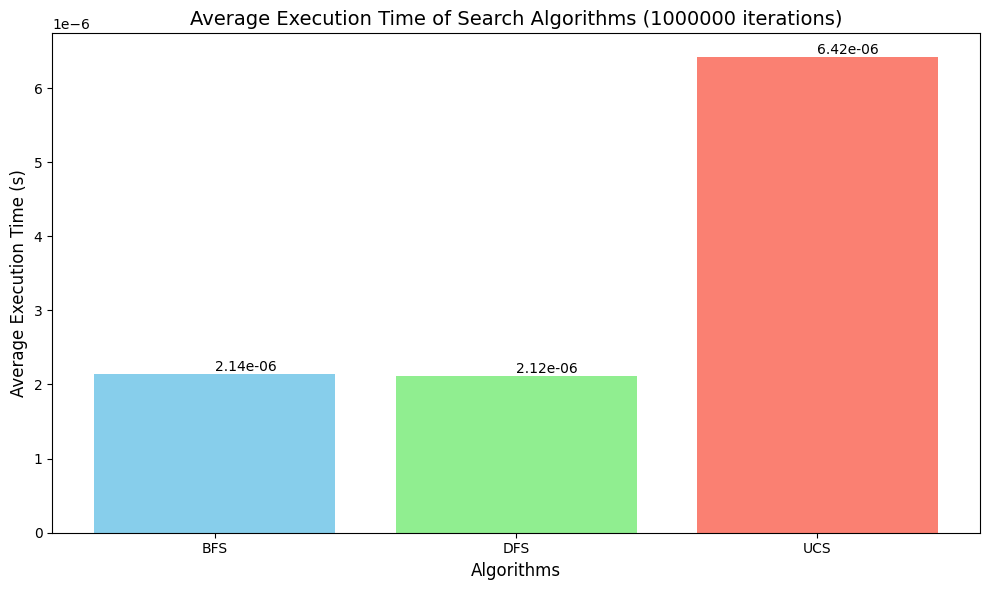

In [121]:
import time

def measure_time_quick(func, iterations=10000, *args, **kwargs):
    start_time = time.time()
    for _ in range(iterations):
        func(*args, **kwargs)
    end_time = time.time()
    return (end_time - start_time) / iterations

def plot_average_execution_time(algorithms, times):
    fig, ax = plt.subplots(figsize=(10, 6))
    
    bars = ax.bar(algorithms, times, color=['skyblue', 'lightgreen', 'salmon'],)
    
    ax.set_xlabel('Algorithms', fontsize=12)
    ax.set_ylabel('Average Execution Time (s)', fontsize=12)
    ax.set_title('Average Execution Time of Search Algorithms (1000000 iterations)', fontsize=14)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2.0, yval, f'{yval:.2e}', va='bottom')  # format as scientific
    
    ax.ticklabel_format(style='scientific', axis='y', scilimits=(0,0))
    
    plt.tight_layout()
    plt.show()
    return fig, ax

avg_time_ucs = measure_time_quick(ucs, iterations=1000000, graph=graph, start=start_node, goal=goal_node)
avg_time_bfs = measure_time_quick(bfs, iterations=1000000, graph=graph, start=start_node, goal=goal_node)
avg_time_dfs = measure_time_quick(dfs, iterations=1000000, graph=graph, start=start_node, goal=goal_node)

algorithms = ['BFS', 'DFS', 'UCS']
times = [avg_time_bfs, avg_time_dfs, avg_time_ucs]

fig, ax = plot_average_execution_time(algorithms, times)

To summarize the results, we will create a table with the average time taken, average number of nodes, average cost and average path taken to reach the goal node.

<table style='width:80%; border: 1px solid black; border-collapse: collapse;'>
  <tr>
    <th>Algorithm</th>
    <th>Time (s)</th>
    <th>Path</th>
    <th>Cost</th>
    <th>Order of Visited Nodes</th>
  </tr>
  <tr>
    <td>BFS</td>
    <td>2.15e-06</td>
    <td>S -> B -> G</td>
    <td>15</td>
    <td>S -> A -> B -> C -> D -> G</td>
  </tr>
  <tr>
    <td>DFS</td>
    <td>2.22e-06</td>
    <td>S -> A -> D -> B -> G</td>
    <td>19</td>
    <td>S -> A -> D -> B -> G</td>
  </tr>
  <tr>
    <td>UCS</td>
    <td>7.30e-06</td>
    <td>S -> C -> E -> B -> G</td>
    <td>14</td>
    <td>S -> C -> A -> E -> B -> D -> H -> F -> G</td>
  </tr>
</table>


# Conclusion

In this notebook, we implemented the three search algorithms: `BFS`, `DFS` and `UCS` and analyzed the results in terms of time taken, number of nodes, cost and path taken to reach the goal node.

We can see that the `DFS` algorithm is the fastest one, taking only 2.22e-06 seconds in average to find the path, while the `UCS` algorithm is the slowest one, taking 7.301e-06 seconds to find the path. But the `UCS` algorithm has the best path and cost, while the `DFS` algorithm has the worst path and cost.

The `BFS` algorithm is by far the best one, taking 2.15e-06 seconds to find the path, having a good path and cost. It is not the shortest path, but it is the best one in terms of number of nodes, taking only 2 nodes to find the path, the average execution time is similar to the `DFS` algorithm and the path and cost are better than the `DFS` algorithm.

In terms of number of nodes, the `BFS` algorithm is the best one, taking only 2 nodes to find the path, while the `UCS` algorithm is the worst one, visiting all the 8 nodes to find the path.

In conclusion, the `UCS` algorithm is the best one in terms of path and cost, but it is the slowest one. The `DFS` algorithm is the fastest one, but it has the worst path and cost. The `BFS` algorithm is in the middle, having a good path and cost, and being the best one in terms of number of nodes and having a similar time taken to the `DFS` algorithm.
